In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)%%!
import seaborn as sns
import matplotlib.pyplot as plt

# Filter Methods

+ Filter methods select features from a dataset independently for any machine learning algorithm. These methods rely only on the characteristics of these variables, so features are filtered out of the data before learning begins.

+ Filter methods are generally used as a preprocessing step. The selection of features is independent of any machine learning algorithms. Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. The correlation is a subjective term here

+ Filter Methods:
  
  + Correlation methods
  
  + Statistical Measures
  
  + Mutual Information
 
  + Chi Squared Score

In [4]:
ratings_data = pd.read_csv("./dataset/ml-latest-small/ratings.csv")
movies_data = pd.read_csv("./dataset/ml-latest-small/movies.csv")
links_data = pd.read_csv("./dataset/ml-latest-small/links_production.csv")

data = pd.merge(ratings_data, pd.merge(movies_data, links_data, on="movieId"), on="movieId")
data['genres'] = data['genres'].apply(lambda x: x.split('|'))
data.to_csv("./dataset/movielens_1m_summary.csv", index=False)
data.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,true imdbId,director,writers,stars
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,tt0114709,['John Lasseter'],"['Pete Docter', 'Andrew Stanton', 'John Lasset...","['Tom Hanks', 'Tim Allen', 'Don Rickles']"
1,1,3,4.0,964981247,Grumpier Old Men (1995),"[Comedy, Romance]",113228,15602.0,tt0113228,['Howard Deutch'],"['Mark Steven Johnson', 'Writer']","['Walter Matthau', 'Jack Lemmon', 'Ann-Margret']"
2,1,6,4.0,964982224,Heat (1995),"[Action, Crime, Thriller]",113277,949.0,tt0113277,['Michael Mann'],['Michael Mann'],"['Robert De Niro', 'Al Pacino', 'Val Kilmer']"
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",114369,807.0,tt0114369,['David Fincher'],['Andrew Kevin Walker'],"['Morgan Freeman', 'Brad Pitt', 'Kevin Spacey']"
4,1,50,5.0,964982931,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",114814,629.0,tt0114814,['Bryan Singer'],['Christopher McQuarrie'],"['Gabriel Byrne', 'Chazz Palminteri', 'Kevin S..."


### Analysis

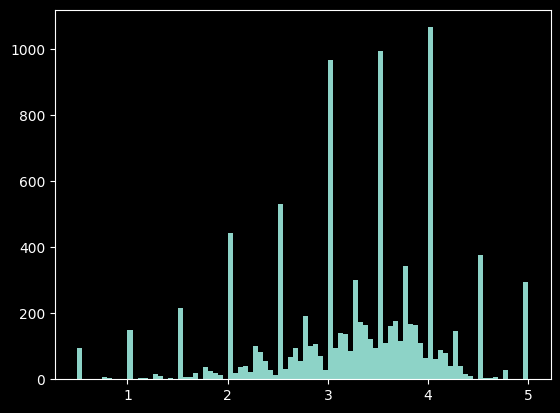

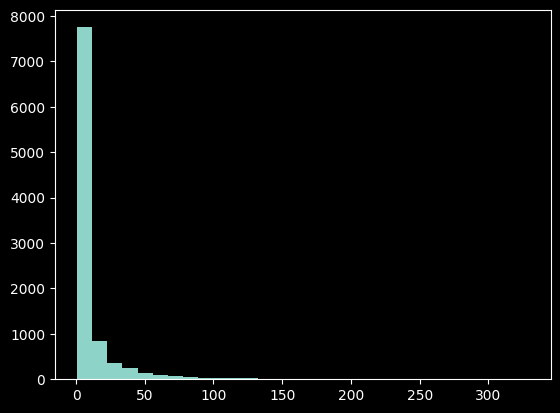

,title,rating_count,rating_mean
3158,Forrest Gump (1994),329,4.164134
7593,"Shawshank Redemption, The (1994)",317,4.429022
6865,Pulp Fiction (1994),307,4.197068
7680,"Silence of the Lambs, The (1991)",279,4.161290
5512,"Matrix, The (1999)",278,4.192446
8001,Star Wars: Episode IV - A New Hope (1977),251,4.231076
4662,Jurassic Park (1993),238,3.750000
1337,Braveheart (1995),237,4.031646
8363,Terminator 2: Judgment Day (1991),224,3.970982
7421,Schindler's List (1993),220,4.225000


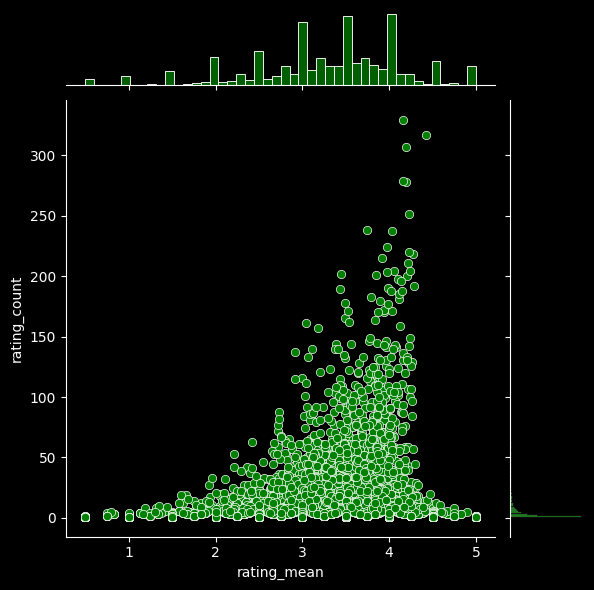

In [8]:
# Load dataset (assuming it's a CSV file)
df = pd.read_csv("./dataset/movielens_1m_summary.csv")

# Convert genres, directors, writers, and stars from string to list
df['genres'] = df['genres'].apply(lambda x: eval(x))
df['director'] = df['director'].apply(lambda x: eval(x))  # Convert from string representation of list
df['writers'] = df['writers'].apply(lambda x: eval(x))    # Convert from string representation of list
df['stars'] = df['stars'].apply(lambda x: eval(x))        # Convert from string representation of list

# 1. Group by **Title** (Count & Mean Rating)
title_stats = df.groupby('title')['rating'].agg(['count', 'mean']).reset_index().rename(columns={'count': 'rating_count', 'mean': 'rating_mean'})

# 2. Group by **Genres** (Explode to analyze each genre separately)
genre_stats = df.explode('genres').groupby('genres')['rating'].agg(['count', 'mean']).reset_index().rename(columns={'count': 'rating_count', 'mean': 'rating_mean'})

# 3. Group by **Director** (Explode)
director_stats = df.explode('director').groupby('director')['rating'].agg(['count', 'mean']).reset_index().rename(columns={'count': 'rating_count', 'mean': 'rating_mean'})

# 4. Group by **Writers** (Explode)
writer_stats = df.explode('writers').groupby('writers')['rating'].agg(['count', 'mean']).reset_index().rename(columns={'count': 'rating_count', 'mean': 'rating_mean'})

# 5. Group by **Stars** (Explode)
stars_stats = df.explode('stars').groupby('stars')['rating'].agg(['count', 'mean']).reset_index().rename(columns={'count': 'rating_count', 'mean': 'rating_mean'})

# Display dataframes

plt.hist(title_stats['rating_mean'], bins=90)
plt.show()
plt.hist(title_stats['rating_count'], bins=30)
plt.show()

sns.jointplot(x=title_stats['rating_mean'], 
              y=title_stats['rating_count'], data=title_stats,
              color='green', height=6)

title_stats.sort_values("rating_count", ascending=False).head(10)

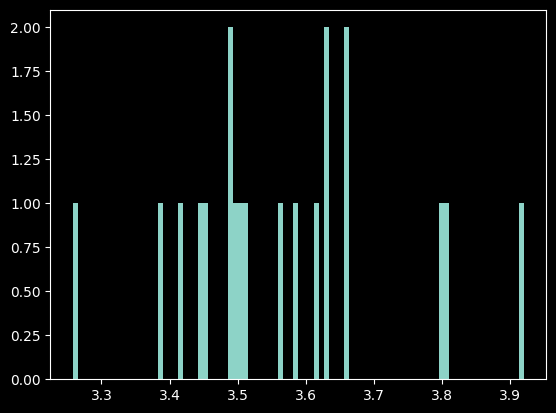

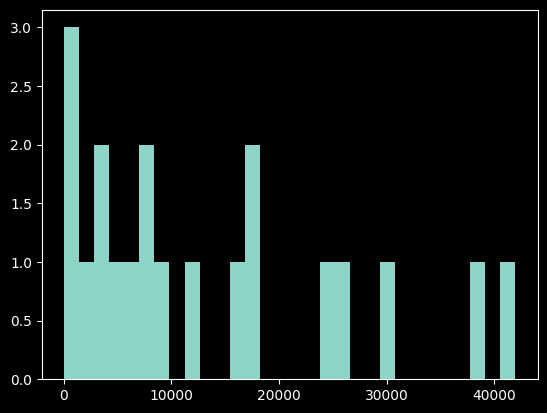

,genres,rating_count,rating_mean
8,Drama,41928,3.656184
5,Comedy,39053,3.384721
1,Action,30635,3.447984
17,Thriller,26452,3.493706
2,Adventure,24161,3.508609


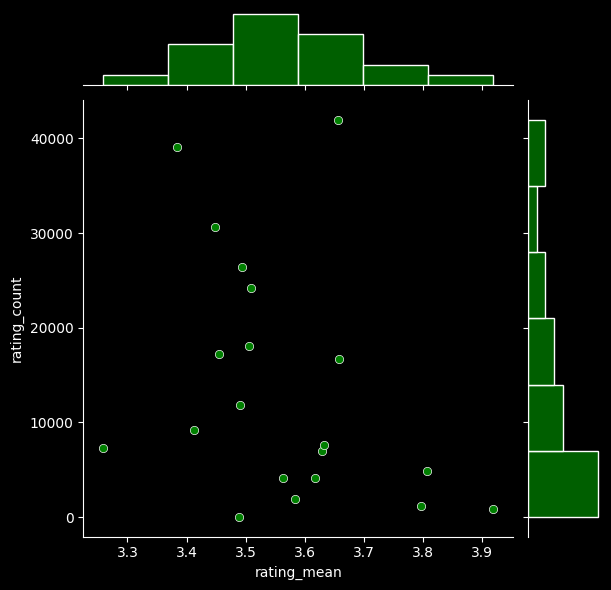

In [9]:

plt.hist(genre_stats['rating_mean'], bins=90)
plt.show()
plt.hist(genre_stats['rating_count'], bins=30)
plt.show()

sns.jointplot(x=genre_stats['rating_mean'], 
              y=genre_stats['rating_count'], data=genre_stats,
              color='green', height=6)

genre_stats.sort_values("rating_count", ascending=False).head()

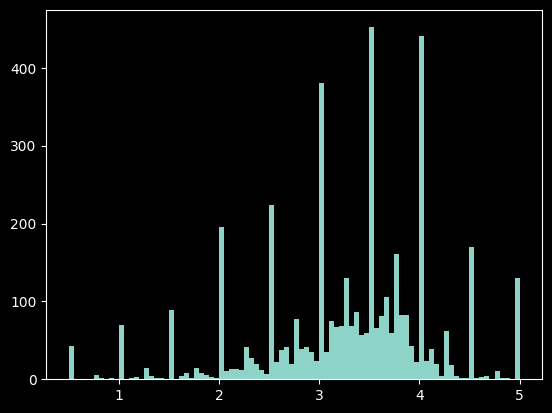

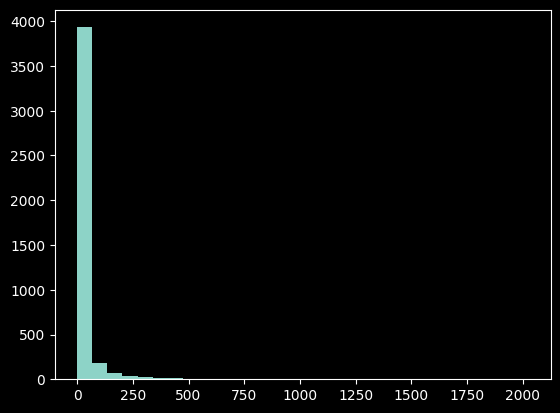

,director,rating_count,rating_mean
3863,Steven Spielberg,2026,3.807256
3483,Robert Zemeckis,1080,3.783333
3274,Quentin Tarantino,1041,4.006244
1709,James Cameron,961,3.719563
3988,Tim Burton,957,3.364681
680,Christopher Nolan,858,4.019231
3387,Ridley Scott,824,3.777306
2697,Martin Scorsese,800,3.977500
887,David Fincher,793,3.861286
3191,Peter Jackson,762,3.960630


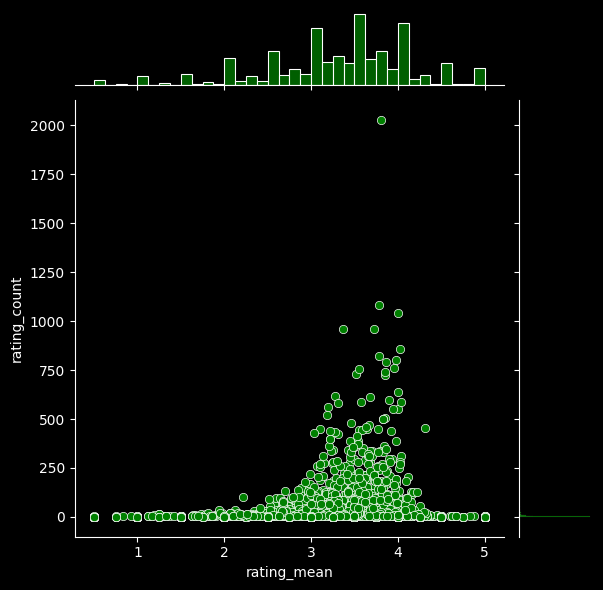

In [10]:
plt.hist(director_stats['rating_mean'], bins=90)
plt.show()
plt.hist(director_stats['rating_count'], bins=30)
plt.show()

sns.jointplot(x=director_stats['rating_mean'], 
              y=director_stats['rating_count'], data=director_stats,
              color='green', height=6)

director_stats.sort_values("rating_count", ascending=False).head(10)

In [11]:
writer_stats.sort_values("rating_count", ascending=False).head(10)

,writers,rating_count,rating_mean
9914,Writer,2663,3.556515
3199,George Lucas,1570,3.871975
7667,Quentin Tarantino,1142,3.933012
4024,James Cameron,997,3.695587
8840,Stephen King,970,3.861340
2065,David Koepp,899,3.400445
1568,Christopher Nolan,847,4.028335
9135,Ted Elliott,803,3.556663
4794,John Hughes,787,3.269377
5713,Lawrence Kasdan,775,4.030968


In [12]:
stars_stats.sort_values("rating_count", ascending=False).head(10)

,stars,rating_count,rating_mean
10359,Tom Hanks,2226,3.767969
3890,Harrison Ford,1939,3.894018
1264,Brad Pitt,1635,3.788379
1413,Bruce Willis,1510,3.546358
10353,Tom Cruise,1493,3.505023
8932,Robert De Niro,1422,3.732419
4932,Jim Carrey,1376,3.225291
5261,Johnny Depp,1269,3.529157
7094,Matt Damon,1214,3.792834
7245,Mel Gibson,1200,3.467500


In [49]:
df.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId,true imdbId,director,writers,stars
0,1,1,4.0,964982703,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",114709,862.0,tt0114709,[John Lasseter],"[Pete Docter, Andrew Stanton, John Lasseter]","[Tom Hanks, Tim Allen, Don Rickles]"
1,1,3,4.0,964981247,Grumpier Old Men (1995),"[Comedy, Romance]",113228,15602.0,tt0113228,[Howard Deutch],"[Mark Steven Johnson, Writer]","[Walter Matthau, Jack Lemmon, Ann-Margret]"
2,1,6,4.0,964982224,Heat (1995),"[Action, Crime, Thriller]",113277,949.0,tt0113277,[Michael Mann],[Michael Mann],"[Robert De Niro, Al Pacino, Val Kilmer]"
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),"[Mystery, Thriller]",114369,807.0,tt0114369,[David Fincher],[Andrew Kevin Walker],"[Morgan Freeman, Brad Pitt, Kevin Spacey]"
4,1,50,5.0,964982931,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",114814,629.0,tt0114814,[Bryan Singer],[Christopher McQuarrie],"[Gabriel Byrne, Chazz Palminteri, Kevin Spacey]"


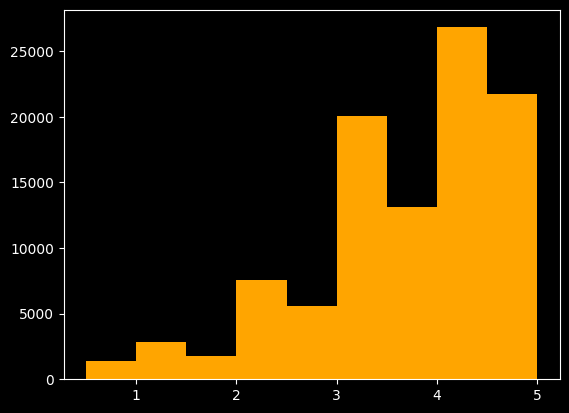

In [16]:
# Plot rating counts histogram
plt.hist(df['rating'], bins=9, color='orange')
plt.show()

In [20]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_regression, f_regression
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Convert categorical variables to numerical representations
df = pd.read_csv("./dataset/movielens_1m_summary.csv")

# Drop unnecessary columns
columns_to_drop = ["timestamp", "imdbId", "tmdbId", "true imdbId", "title"]
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# 
encoder = LabelEncoder()
df['userId'] = encoder.fit_transform(df['userId'])
df['movieId'] = encoder.fit_transform(df['movieId'])


# Convert list-type columns to a single categorical string for encoding
df['genres'] = df['genres'].apply(lambda x: ' '.join(x))
df['director'] = df['director'].apply(lambda x: ' '.join(x))
df['writers'] = df['writers'].apply(lambda x: ' '.join(x))
df['stars'] = df['stars'].apply(lambda x: ' '.join(x))

# Encoding categorical features numerically
df['genres'] = encoder.fit_transform(df['genres'])
df['director'] = encoder.fit_transform(df['director'])
df['writers'] = encoder.fit_transform(df['writers'])
df['stars'] = encoder.fit_transform(df['stars'])

# List of categorical columns to encode
categorical_columns = ["genres", "director", "writers", "stars"]

# Apply Label Encoding to categorical features
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# Define features and target variable
X = df.drop(columns=['rating'])  # Features
y = df['rating']  # Target variable

# 1. Variance Threshold (Remove low-variance features)
selector = VarianceThreshold(threshold=0.01)
X_var_filtered = selector.fit_transform(X)

# Retain column names after Variance Thresholding
selected_columns = X.columns[selector.get_support()]
X_var_filtered_df = pd.DataFrame(X_var_filtered, columns=selected_columns)

# 2. Correlation-Based Feature Selection
cor_matrix = X_var_filtered_df.corr().abs()
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
X_corr_filtered = X_var_filtered_df.drop(columns=to_drop, errors='ignore')

# 3. Mutual Information for Feature Selection
mi_scores = mutual_info_regression(X_corr_filtered, y)
mi_series = pd.Series(mi_scores, index=X_corr_filtered.columns).sort_values(ascending=False)
top_mi_features = mi_series.head(5).index
X_mi_filtered = X_corr_filtered[top_mi_features]

# 4. ANOVA (F-test) for Feature Selection
anova_selector = SelectKBest(score_func=f_regression, k=min(5, X_corr_filtered.shape[1]))  # Ensure we do not exceed available features
X_anova_filtered = anova_selector.fit_transform(X_corr_filtered, y)
anova_selected_features = X_corr_filtered.columns[anova_selector.get_support()]

# Display the selected features
selected_features_df = pd.DataFrame({
    "Feature": list(top_mi_features) + list(anova_selected_features),
    "Selection Method": ["Mutual Information"] * len(top_mi_features) + ["ANOVA"] * len(anova_selected_features)
}).drop_duplicates()

selected_features_df

,Feature,Selection Method
0,userId,Mutual Information
1,movieId,Mutual Information
2,stars,Mutual Information
3,writers,Mutual Information
4,director,Mutual Information
5,userId,ANOVA
6,movieId,ANOVA
7,genres,ANOVA
8,director,ANOVA
9,stars,ANOVA


In [19]:
from sklearn.feature_selection import chi2
from scipy.stats import pearsonr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df.drop(columns=['rating'])  # Features
y = df['rating']  # Target variable

# Convert rating into categorical bins
df['rating_category'] = pd.cut(df['rating'], bins=[0, 2, 3, 4, 5], labels=['Low', 'Medium', 'High', 'Very High'])

# Use categorical target for Chi-Square and LDA
y_categorical = df['rating_category']

# Use continuous target for Pearson correlation and Mutual Information
y_continuous = df['rating']

# 1. Chi-Square Test (For categorical data)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Normalize features
chi2_selector = SelectKBest(score_func=chi2, k=min(5, X.shape[1]))
X_chi2_filtered = chi2_selector.fit_transform(X_scaled, y_categorical)
chi2_selected_features = X.columns[chi2_selector.get_support()]

# 2. Pearson Correlation
pearson_results = {col: pearsonr(X[col], y_continuous)[0] for col in X.columns}
pearson_df = pd.DataFrame(pearson_results.items(), columns=['Feature', 'Pearson Correlation'])
pearson_df = pearson_df.sort_values(by='Pearson Correlation', ascending=False).head(5)

# 3. Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y_categorical)

# Display results
chi2_df = pd.DataFrame({
    "Feature": chi2_selected_features,
    "Selection Method": "Chi-Square"
})

lda_df = pd.DataFrame({
    "Feature": X.columns,
    "LDA Coefficient": lda.coef_[0]
}).sort_values(by="LDA Coefficient", ascending=False).head(5)

# Merging results into a single dataframe
final_selected_features = pd.concat([chi2_df, pearson_df, lda_df.rename(columns={"LDA Coefficient": "Selection Score"})])


final_selected_features

,Feature,Selection Method,Pearson Correlation,Selection Score
0,userId,Chi-Square,NaN,NaN
1,movieId,Chi-Square,NaN,NaN
2,genres,Chi-Square,NaN,NaN
3,director,Chi-Square,NaN,NaN
4,writers,Chi-Square,NaN,NaN
2,genres,NaN,0.029996,NaN
5,stars,NaN,0.011555,NaN
4,writers,NaN,-0.008702,NaN
3,director,NaN,-0.014940,NaN
1,movieId,NaN,-0.023547,NaN
